## Table of contents

#### 01. Importing data and libraries
#### 02. Data prep for regression analysis  
    Scatterplot  
    Hypothesis  
    Reshaping  
    Splitting
#### 03. Regression analysis
    Conclusions

### 01. Importing data and libraries

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Create a folder path

path = r'/Users/edytakowal/Desktop/CareerFoundry/2. Data Immersion/6. Advanced Analytics & Dashboard Design/World_Happiness_Report'

In [3]:
# Import the data

df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', '2015-2023.csv'), index_col = False)
df.head()

,Unnamed: 0,Unnamed: 0.1,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,corruption_perceptions,year,happiness_rank,avg_happiness_score,happiness_category,annual_average,avg_annual_region,avg_annual
0,0,0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,1,7.493322,Happy,5.375734,6.689619,5.375734
1,1,1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,2,7.522278,Happy,5.375734,6.689619,5.375734
2,2,2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,3,7.579733,Happy,5.375734,6.689619,5.375734
3,3,3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,4,7.473889,Happy,5.375734,6.689619,5.375734
4,4,4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,5,7.230456,Happy,5.375734,7.279000,5.375734


In [4]:
df.shape

(1362, 18)

### 02. Data prep for regression analysis

In [5]:
# Check the column names 

df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'country', 'region', 'happiness_score',
       'gdp_per_capita', 'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity', 'corruption_perceptions',
       'year', 'happiness_rank', 'avg_happiness_score', 'happiness_category',
       'annual_average', 'avg_annual_region', 'avg_annual'],
      dtype='object')

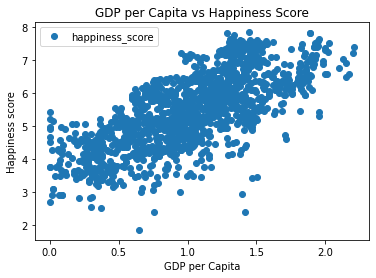

In [7]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other

df.plot(x = 'gdp_per_capita', y = 'happiness_score',style = 'o') 
plt.title('GDP per Capita vs Happiness Score')  
plt.xlabel('GDP per Capita')  
plt.ylabel('Happiness score')  
plt.show()

### Hypothesis

#### GDP per capita
Countries with higher GDP per capita are likely to have higher happiness scores, suggesting that economic well-being is a significant predictor of happiness.

### Reshaping

In [ ]:
# GDP_per_Capita - Reshape the variables into NumPy arrays and put them into separate objects

X = df['gdp_per_capita'].values.reshape(-1,1)
y = df['Happiness_Score'].values.reshape(-1,1)

#### Splitting data into a training set and a test set

In [ ]:
# Split data into a training set and a test set 

# GDP_per_Capita
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 03. Regression analysis

In [ ]:
# Create a regression object

regression = LinearRegression()

In [ ]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

In [ ]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

In [ ]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per Capita vs Happiness Score (Test set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Happiness score')
plot_test.show()

You can immediately see that the linear model represented by the red regression line does not perfectly cover all data points, but there is a strong positive correlation, Happiness_Score data points go up as GDP_per_capita increases.

In [ ]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [ ]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

In [ ]:
# Create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

##### Compare how the regression fits the training set

In [ ]:
# Predict

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [ ]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [ ]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

In [ ]:
# Visualizing the training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color = 'green', s = 15)
plot_test.plot(X_train, y_predicted_train, color = 'red', linewidth = 3)
plot_test.title('GDP per Capita vs Happiness Score (Train set)')
plot_test.xlabel('GDP per Capita')
plot_test.ylabel('Happiness score')
plot_test.show()

Slope  
The slope indicates that there is a positive relationship between the independent and the dependent variable. For each unit increase in the independent variable, we can expect an increase of approximately 2.152 units in the dependent variable. This suggests that the model has captured a meaningful relationship between the variables.

Mean Squared Error  
As the Mean Squared Error tells us how close a regression line is to a set of points, lower value is generally better. In this case, the MSE is relatively low, which indicates that the model's predictions are fairly close to the actual values. However, whether this level of error is acceptable or not depends on what accuracy is expected.

R2 Score  
The R2 score of approximately 0.6445 suggests that the model explains about 64.45% of the variance in the dependent variable. While an R2 score of 1 would indicate a perfect fit and 0 indicate a poor fit, an R2 score of 0.6445 we can assume as a moderate fit. 

The model appears to have captured meaningful relationship between the variables, and it provides pretty good predictions with a relatively low MSE and a moderate R2 score.
In some cases this performance can be satisfactory but it depends on the specific requirements and objectives of analysis or project. 